# Importing dependencies
**Pip, in case of no Module errors**

*Note: If you are using collab, this might not work, do it in your local machine*

**If you are making dataset from internet**

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader

**If you are making dataset from your own camera**

In [8]:
import cv2
import os
import time
import labelme
# if you want to name your captured images with unique id's you could use uuid

# Data collection

In [10]:
data_dir = 'data'
num_Img = 5

In [11]:
# making data folders
if os.path.exists(data_dir):
    if os.path.exists(os.path.join(data_dir,'image')):
        pass
    else:
        os.mkdir(os.path.join(data_dir,'image'))
        
    if os.path.exists(os.path.join(data_dir,'label')):
        pass
    else:
        os.mkdir(os.path.join(data_dir,'label'))
else:
    os.mkdir(os.path.join(data_dir))
    os.mkdir(os.path.join(data_dir,'image'))
    os.mkdir(os.path.join(data_dir,'label'))

In [11]:
cap = cv2.VideoCapture(0)
for img_Num in range(num_Img):
    ret, frame = cap.read()
    cv2.imwrite(os.path.join(data_dir,'image','cap_img_{}.jpg'.format(img_Num)), frame)
    cv2.imshow('image',frame)
    time.sleep(5)
    if cv2.waitKey(10) and 0xFF == 'q':
        break
cap.release()
cv2.destroyAllWindows()

**Load images fom bing search engine**

In [15]:
img_dir = os.path.join(data_dir,'image')
downloader.download('People', limit = 50, output_dir = img_dir, adult_filter_off = False)

# Labeling

In [64]:
!labelme

In [18]:
# check
len(os.listdir(img_dir)), len(os.listdir(os.path.join(data_dir,'label')))

(74, 74)

In [4]:
pip install albumentations

  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import albumentations as A

In [109]:
sample_aug = A.Compose([A.RandomBrightness(p=0.5),
                        A.RandomContrast(p=0.5),
                        A.RandomGamma(p=0.2),
                        A.RandomSunFlare(p=0.1),
                        A.RandomGravel(p=0.1),
                        A.RandomRain(p=0.3),
                        A.RandomToneCurve(p=0.3),
                        A.HorizontalFlip(p=0.5),
                        A.VerticalFlip(p=0.5),
                        A.RandomRotate90(p=0.3)],
                       keypoint_params=A.KeypointParams(format='xy', label_fields=['class_labels']),)

C:\Users\raraj\anaconda3\lib\site-packages\albumentations\augmentations\transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
C:\Users\raraj\anaconda3\lib\site-packages\albumentations\augmentations\transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [68]:
import json
import matplotlib.pyplot as plt

[(307.2936507936508, 271.3492063492063), (208.88095238095235, 279.2857142857142)] ['right eye', 'left eye']


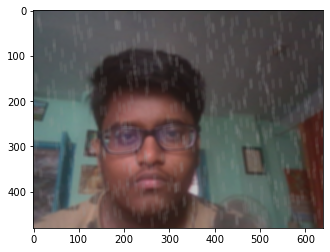

In [116]:
img = cv2.imread(os.path.join(data_dir,'image','cap_img_0.jpg'))
with open(os.path.join(data_dir,'label','cap_img_0.json')) as f:
    annot = json.load(f)
    stuff = annot['shapes']
    aug = sample_aug(image = img,
                     keypoints = [tuple(stuff[0]['points'][0]),tuple(stuff[1]['points'][0])], 
                     class_labels=[stuff[0]['label'], stuff[1]['label']])
    plt.imshow(cv2.cvtColor(aug['image'], cv2.COLOR_BGR2RGB))
    print(aug['keypoints'],aug['class_labels'])